# Bikeshare数据集上的特征工程

1、	任务描述
请在Capital Bikeshare （美国Washington, D.C.的一个共享单车公司）提供的自行车数据上进行回归分析。根据每天的天气信息，预测该天的单车共享骑行量。

原始数据集地址：http://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset
1)	文件说明
day.csv: 按天计的单车共享次数（作业只需使用该文件）
hour.csv: 按小时计的单车共享次数（无需理会）
readme：数据说明文件

2)	字段说明
Instant记录号
Dteday：日期
Season：季节（1=春天、2=夏天、3=秋天、4=冬天）
yr：年份，(0: 2011, 1:2012)
mnth：月份( 1 to 12)
hr：小时 (0 to 23)  （只在hour.csv有，作业忽略此字段）
holiday：是否是节假日
weekday：星期中的哪天，取值为0～6
workingday：是否工作日
1=工作日 （是否为工作日，1为工作日，0为非周末或节假日
weathersit：天气（1：晴天，多云 2：雾天，阴天 3：小雪，小雨 4：大雨，大雪，大雾）
temp：气温摄氏度
atemp：体感温度
hum：湿度
windspeed：风速
casual：非注册用户个数
registered：注册用户个数
cnt：给定日期（天）时间（每小时）总租车人数，响应变量y （cnt = casual + registered）

casual、registered和cnt三个特征均为要预测的y，作业里只需对cnt进行预测

## 导入必要的工具包

In [1]:
# 数据读取及基本处理
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt   #画图
import seaborn as sns
# 图形出现在Notebook里而不是新窗口
%matplotlib inline

## 读入数据

数据预处理对训练数据和测试数据需进行同样处理，因此将二者一起读入

In [2]:
# 读入数据
train = pd.read_csv("day.csv")
train.head()
#print("train : " + str(train.shape))

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
train.shape

(731, 16)

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
instant       731 non-null int64
dteday        731 non-null object
season        731 non-null int64
yr            731 non-null int64
mnth          731 non-null int64
holiday       731 non-null int64
weekday       731 non-null int64
workingday    731 non-null int64
weathersit    731 non-null int64
temp          731 non-null float64
atemp         731 non-null float64
hum           731 non-null float64
windspeed     731 non-null float64
casual        731 non-null int64
registered    731 non-null int64
cnt           731 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


没有缺失数据

## 数据探索

In [5]:
#对数据值型特征，用常用统计量观察其分布
train.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [6]:
#对类别型特征，观察其取值范围及直方图
categorical_features = ['season','mnth','weathersit','weekday']
for col in categorical_features:
    print('\n%s属性的不同取值和出现的次数'%col)
    print(train[col].value_counts())
    train[col] = train[col].astype('object')


season属性的不同取值和出现的次数
3    188
2    184
1    181
4    178
Name: season, dtype: int64

mnth属性的不同取值和出现的次数
12    62
10    62
8     62
7     62
5     62
3     62
1     62
11    60
9     60
6     60
4     60
2     57
Name: mnth, dtype: int64

weathersit属性的不同取值和出现的次数
1    463
2    247
3     21
Name: weathersit, dtype: int64

weekday属性的不同取值和出现的次数
6    105
1    105
0    105
5    104
4    104
3    104
2    104
Name: weekday, dtype: int64


类别型特征的取值不多
类别型特征可以采用独热编码（One hot encoding）/哑编码

## 特征工程

In [7]:
categorical_features = ['season','mnth','weathersit','weekday']
x_train_cat = train[categorical_features]
x_train_cat = pd.get_dummies(x_train_cat)
x_train_cat.head()

,season_1,season_2,season_3,season_4,mnth_1,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,...,weathersit_1,weathersit_2,weathersit_3,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,1,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1,1,0,0,0,1,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
2,1,0,0,0,1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
3,1,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0


In [8]:
#数值型变量预处理
from sklearn.preprocessing import MinMaxScaler
mn_x = MinMaxScaler()
numerical_features = ['temp','atemp','hum','windspeed']
temp = mn_x.fit_transform(train[numerical_features])

x_train_num = pd.DataFrame(data=temp, columns=numerical_features, index =train.index)
x_train_num.head()

,temp,atemp,hum,windspeed
0,0.355170,0.373517,0.828620,0.284606
1,0.379232,0.360541,0.715771,0.466215
2,0.171000,0.144830,0.449638,0.465740
3,0.175530,0.174649,0.607131,0.284297
4,0.209120,0.197158,0.449313,0.339143


In [9]:
# Join categorical and numerical features
x_train = pd.concat([x_train_cat, x_train_num, train['holiday'],  train['workingday']], axis = 1, ignore_index=False)
x_train.head()

,season_1,season_2,season_3,season_4,mnth_1,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,...,weekday_3,weekday_4,weekday_5,weekday_6,temp,atemp,hum,windspeed,holiday,workingday
0,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0.355170,0.373517,0.828620,0.284606,0,0
1,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0.379232,0.360541,0.715771,0.466215,0,0
2,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0.171000,0.144830,0.449638,0.465740,0,1
3,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0.175530,0.174649,0.607131,0.284297,0,1
4,1,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0.209120,0.197158,0.449313,0.339143,0,1


In [10]:
FE_train = pd.concat([train['instant'], x_train,  train['yr'],train['cnt']], axis = 1)
FE_train.to_csv('FE_day.csv', index=False)
FE_train.head()

,instant,season_1,season_2,season_3,season_4,mnth_1,mnth_2,mnth_3,mnth_4,mnth_5,...,weekday_5,weekday_6,temp,atemp,hum,windspeed,holiday,workingday,yr,cnt
0,1,1,0,0,0,1,0,0,0,0,...,0,1,0.355170,0.373517,0.828620,0.284606,0,0,0,985
1,2,1,0,0,0,1,0,0,0,0,...,0,0,0.379232,0.360541,0.715771,0.466215,0,0,0,801
2,3,1,0,0,0,1,0,0,0,0,...,0,0,0.171000,0.144830,0.449638,0.465740,0,1,0,1349
3,4,1,0,0,0,1,0,0,0,0,...,0,0,0.175530,0.174649,0.607131,0.284297,0,1,0,1562
4,5,1,0,0,0,1,0,0,0,0,...,0,0,0.209120,0.197158,0.449313,0.339143,0,1,0,1600


In [11]:
# FE_train.info()

In [12]:
## 3、确定模型类型

In [13]:
'''
据探索分析：
0. 骑行人数是一个连续变化的量，所以该题应该使用回归算法解答
1. 2011年和2012年日均骑车人数分布差异明显，且观察一年中每天的骑车量发现12年总体大于11年,所以可以认为年数与骑行人数是一个正相关
2. 观察天气和骑车数目的关系图表，发现两者呈负相关关系
3. 工作日和节假日对骑行的影响不大，季节变化影响较大，骑行高峰集中在5-9月份
4. 温度和体感温度对骑行人数的影响相同，两种的相关系数约等于1，线性相关，计算时取其一
5. 湿度和风速和骑行人数呈负相关关系
'''

'\n据探索分析：\n0. 骑行人数是一个连续变化的量，所以该题应该使用回归算法解答\n1. 2011年和2012年日均骑车人数分布差异明显，且观察一年中每天的骑车量发现12年总体大于11年,所以可以认为年数与骑行人数是一个正相关\n2. 观察天气和骑车数目的关系图表，发现两者呈负相关关系\n3. 工作日和节假日对骑行的影响不大，季节变化影响较大，骑行高峰集中在5-9月份\n4. 温度和体感温度对骑行人数的影响相同，两种的相关系数约等于1，线性相关，计算时取其一\n5. 湿度和风速和骑行人数呈负相关关系\n'

In [14]:
y=train['cnt'].values
x=train[['yr','weathersit','atemp','hum','windspeed']]

columns=x.columns

#将数据分割训练数据与测试数据
from sklearn.model_selection import train_test_split

# 随机采样20%的数据构建测试样本，其余作为训练样本
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=10, test_size=0.2)
x_train.shape

(584, 5)

In [15]:
# # 数据标准化
# from sklearn.preprocessing import StandardScaler

# # 分别初始化对特征和目标值的标准化器
# ss_X = StandardScaler()
# ss_y = StandardScaler()

# # 分别对训练和测试数据的特征以及目标值进行标准化处理
# x_train = ss_X.fit_transform(x_train)
# x_test = ss_X.transform(x_test)

# #对y做标准化不是必须
# #对y标准化的好处是不同问题的w差异不太大，同时正则参数的范围也有限
# y_train = ss_y.fit_transform(y_train.reshape(-1, 1))
# y_test = ss_y.transform(y_test.reshape(-1, 1))

In [16]:
# 3、确定模型类型
#线性回归

from sklearn.linear_model import LinearRegression

# 使用默认配置初始化
lr = LinearRegression()

# 训练模型参数
lr.fit(x_train, y_train)

# 预测
y_test_pred_lr = lr.predict(x_test)
y_train_pred_lr = lr.predict(x_train)


# 看看各特征的权重系数，系数的绝对值大小可视为该特征的重要性
fs = pd.DataFrame({"columns":list(columns), "coef":list((lr.coef_.T))})
fs.sort_values(by=['coef'],ascending=False)

,columns,coef
2,atemp,6857.497322
0,yr,2057.059769
1,weathersit,-535.712104
3,hum,-716.020865
4,windspeed,-3393.129047


In [17]:

# 使用rmse评价模型在测试集和训练集上的性能，并输出评估结果
from sklearn import metrics

#测试集
print('The rmse value of LinearRegression on test is', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_lr)))
#训练集
print('The rmse value of LinearRegression on train is', np.sqrt(metrics.mean_squared_error(y_train, y_train_pred_lr)))

The rmse value of LinearRegression on test is 1065.7732827090376
The rmse value of LinearRegression on train is 960.5005898017467


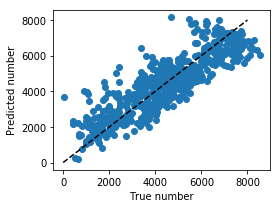

In [25]:
#还可以观察预测值与真值的散点图
plt.figure(figsize=(4, 3))
plt.scatter(y_train, y_train_pred_lr)
plt.plot([0, 8000], [0, 8000], '--k')   #数据已经标准化，3倍标准差即可
plt.axis('tight')
plt.xlabel('True number')
plt.ylabel('Predicted number')
plt.tight_layout()

In [19]:
#岭回归／L2正则
#class sklearn.linear_model.RidgeCV(alphas=(0.1, 1.0, 10.0), fit_intercept=True, 
#                                  normalize=False, scoring=None, cv=None, gcv_mode=None, 
#                                  store_cv_values=False)
from sklearn.linear_model import  RidgeCV

#设置超参数（正则参数）范围
alphas = [ 0.01, 0.1, 0.3,0.5,0.6,1, 10,100]
#n_alphas = 20
#alphas = np.logspace(-5,2,n_alphas)

#生成一个RidgeCV实例
ridge = RidgeCV(alphas=alphas, store_cv_values=True)  

#模型训练
ridge.fit(x_train, y_train)    

#预测
y_test_pred_ridge = ridge.predict(x_test)
y_train_pred_ridge = ridge.predict(x_train)
#测试集
print('The rmse value of LinearRegression on test is', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_lr)))
#训练集
print('The rmse value of LinearRegression on train is', np.sqrt(metrics.mean_squared_error(y_train, y_train_pred_lr)))
#测试集
print('The rmse value of RidgeCV on test is', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_ridge)))
#训练集
print('The rmse value of RidgeCV on train is', np.sqrt(metrics.mean_squared_error(y_train, y_train_pred_ridge)))

The rmse value of LinearRegression on test is 1065.7732827090376
The rmse value of LinearRegression on train is 960.5005898017467
The rmse value of RidgeCV on test is 1065.2611149711738
The rmse value of RidgeCV on train is 960.5606505813024


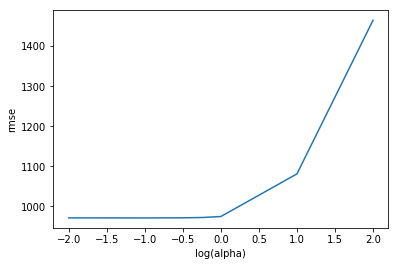

alpha is: 0.1


,columns,coef_lr,coef_ridge
2,atemp,6857.497322,6810.781137
0,yr,2057.059769,2057.540846
1,weathersit,-535.712104,-544.597841
3,hum,-716.020865,-667.913806
4,windspeed,-3393.129047,-3293.118792


In [20]:
mse_mean = np.sqrt(np.mean(ridge.cv_values_, axis = 0))
plt.plot(np.log10(alphas), mse_mean.reshape(len(alphas),1)) 

#这是为了标出最佳参数的位置，不是必须
#plt.plot(np.log10(ridge.alpha_)*np.ones(3), [0.28, 0.29, 0.30])

plt.xlabel('log(alpha)')
plt.ylabel('rmse')
plt.show()

print ('alpha is:', ridge.alpha_) #最佳参数

# 看看各特征的权重系数，系数的绝对值大小可视为该特征的重要性
fs = pd.DataFrame({"columns":list(columns), "coef_lr":list((lr.coef_.T)), "coef_ridge":list((ridge.coef_.T))})
fs.sort_values(by=['coef_lr'],ascending=False)

In [21]:
#### Lasso／L1正则
# class sklearn.linear_model.LassoCV(eps=0.001, n_alphas=100, alphas=None, fit_intercept=True, 
#                                    normalize=False, precompute=’auto’, max_iter=1000, 
#                                    tol=0.0001, copy_X=True, cv=None, verbose=False, n_jobs=1,
#                                    positive=False, random_state=None, selection=’cyclic’)
from sklearn.linear_model import LassoCV

#设置超参数搜索范围
alphas = [ 0.01, 0.1, 1, 10,100]

#生成一个LassoCV实例
lasso = LassoCV(alphas=alphas)  
# lasso = LassoCV()  

#训练（内含CV）
lasso.fit(x_train, y_train)  

#测试
y_test_pred_lasso = lasso.predict(x_test)
y_train_pred_lasso = lasso.predict(x_train)

#测试集
print('The rmse value of LinearRegression on test is', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_lr)))
#训练集
print('The rmse value of LinearRegression on train is', np.sqrt(metrics.mean_squared_error(y_train, y_train_pred_lr)))
#测试集
print('The rmse value of Ridge on test is', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_ridge)))
#训练集
print('The rmse value of Ridge on train is', np.sqrt(metrics.mean_squared_error(y_train, y_train_pred_ridge)))
#测试集
print('The rmse value of Lasso on test is', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_lasso)))
#训练集
print('The rmse value of Lasso on train is', np.sqrt(metrics.mean_squared_error(y_train, y_train_pred_lasso)))

The rmse value of LinearRegression on test is 1065.7732827090376
The rmse value of LinearRegression on train is 960.5005898017467
The rmse value of Ridge on test is 1065.2611149711738
The rmse value of Ridge on train is 960.5606505813024
The rmse value of Lasso on test is 1065.696763894434
The rmse value of Lasso on train is 960.6919418924011


/home/xumeiyu/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


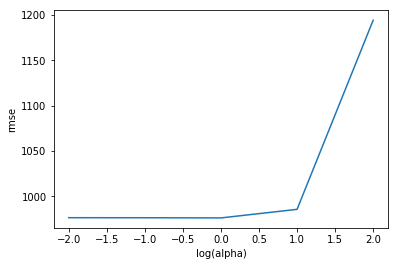

alpha is: 1.0


In [22]:
mses = np.sqrt(np.mean(lasso.mse_path_, axis = 1))
plt.plot(np.log10(lasso.alphas_), mses) 
#plt.plot(np.log10(lasso.alphas_)*np.ones(3), [0.3, 0.4, 1.0])
plt.xlabel('log(alpha)')
plt.ylabel('rmse')
plt.show()    
            
print ('alpha is:', lasso.alpha_)


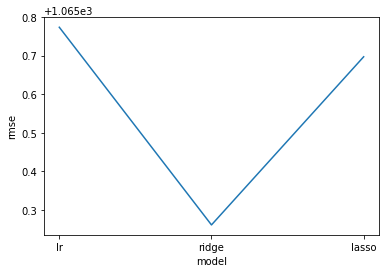

,columns,coef_lr,coef_ridge,coef_lasso
2,atemp,6857.497322,6810.781137,6812.033027
0,yr,2057.059769,2057.540846,2057.214067
1,weathersit,-535.712104,-544.597841,-554.152638
3,hum,-716.020865,-667.913806,-588.956629
4,windspeed,-3393.129047,-3293.118792,-3180.180583


In [23]:
'''
比较：

1. 观察3个模型对于训练样本和测试样本的rms值，发现ridge模型的性能最好
2. 观察各特征的权重系数，发现体感温度的权重最高，yr次之，第三是风速，第四是天气情况，最后是湿度。可以得出结论，在温度适宜且风速较小时，
人们更愿意使用共享单车，而空气的湿度对单车的使用影响很小。
'''
plt.plot(['lr','ridge','lasso'], [np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_lr)),
                                  np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_ridge)),
                                  np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_lasso))]) 
#plt.plot(np.log10(lasso.alphas_)*np.ones(3), [0.3, 0.4, 1.0])
plt.xlabel('model')
plt.ylabel('rmse')
plt.show()    
            
# 看看各特征的权重系数，系数的绝对值大小可视为该特征的重要性
fs = pd.DataFrame({"columns":list(columns), "coef_lr":list((lr.coef_.T)), "coef_ridge":list((ridge.coef_.T)), "coef_lasso":list((lasso.coef_.T))})
fs.sort_values(by=['coef_lr'],ascending=False)